<a href="https://colab.research.google.com/github/yuuki-kusumoto/kusumoto/blob/master/multi_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul  7 02:32:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install transformers

     |████████████████████████████████| 2.5MB 6.8MB/s 
     |████████████████████████████████| 901kB 34.9MB/s 
     |████████████████████████████████| 3.3MB 47.0MB/s 


In [3]:
!apt install aptitude swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp

In [4]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
0 packages upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2

In [5]:
pip install MeCab

     |████████████████████████████████| 71kB 5.3MB/s 
  Created wheel for MeCab: filename=mecab-0.996.3-cp37-cp37m-linux_x86_64.whl size=141795 sha256=51ed132fcfb4cf24a6259d6f9e8ce1f91521653f524bbc0cec11fe2767686e8c
  Stored in directory: /root/.cache/pip/wheels/8f/95/18/2c71c144b3c41ba34f532aa8b6531d1d93980a71db8b3d200b
Successfully built MeCab


In [6]:
pip install mecab-python3

     |████████████████████████████████| 491kB 7.3MB/s 


In [7]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [8]:
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :     tar => ok
[install-mecab-ipadic-NEologd] :     unxz => ok
[install-mecab-ipadic-NEologd] :     xargs => ok
[install-mecab-ipadic-NEologd] :     grep => ok
[install-mecab-ipadic-NEologd] :     iconv => ok
[install-mecab-ipadic-NEologd] :     patch => ok
[install-mecab-ipadi

In [9]:
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')

In [10]:
pip install neologdn

     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for neologdn: filename=neologdn-0.5.1-cp37-cp37m-linux_x86_64.whl size=172952 sha256=097cd3c70014b09695decd70c1fa96e81980c67ac7f240d0d583317074bb83a4
  Stored in directory: /root/.cache/pip/wheels/e0/b8/03/6c4210244645d18770a3314cbdd853879322f42d249cb2b4b0
Successfully built neologdn


In [11]:
pip install ipadic

     |████████████████████████████████| 13.4MB 229kB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-cp37-none-any.whl size=13556725 sha256=e25d25c5ad0cc4b039d506619b4b616b29dcec804df6c8335d35af450881555c
  Stored in directory: /root/.cache/pip/wheels/ff/00/d1/0c094a0ce58a77199a0c5801f0ecf510c80f0ecbec27f07d2c
Successfully built ipadic


In [12]:
pip install mecab-python3

In [13]:
pip install unidic-lite

     |████████████████████████████████| 47.4MB 62kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-cp37-none-any.whl size=47658838 sha256=5c4f06a6a93544f07ad65d01b59d66285372fd1f4cebe2e667407ef2ce62ea48
  Stored in directory: /root/.cache/pip/wheels/20/48/8d/b66d8361a27f58f41ec86640e4fd2640de0403a6367511eab7
Successfully built unidic-lite


In [14]:
# MeCabとtransformersを用意する
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# 以下で報告があるようにmecab-python3のバージョンを0.996.5にしないとtokezerで落ちる
# https://stackoverflow.com/questions/62860717/huggingface-for-japanese-tokenizer
!pip install mecab-python3==0.996.5
!pip install unidic-lite # これないとMeCab実行時にエラーで落ちる
!pip install transformers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already instal

In [15]:
pip install "transformers==2.5.1"

     |████████████████████████████████| 501kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 14.3MB/s 
     |████████████████████████████████| 5.6MB 33.0MB/s 
     |████████████████████████████████| 133kB 46.8MB/s 
     |████████████████████████████████| 7.7MB 49.6MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
ERROR: botocore 1.20.106 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
  Found existing installation: transformers 4.8.2
    Uninstalling transformers-4.8.2:
      Successfully uninstalled transformers-4.8.2


In [16]:
import torch
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

In [17]:
! curl http://www.cl.ecei.tohoku.ac.jp/resources/sent_lex/pn.csv.m3.120408.trim > pn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  676k  100  676k    0     0   555k      0  0:00:01  0:00:01 --:--:--  556k


In [18]:
import transformers
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

# model_nameはここから取得(cf. https://huggingface.co/transformers/pretrained_models.html)
model_name = "cl-tohoku/bert-base-japanese"
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)

CSVデータの読み込み

In [19]:
import pandas as pd

df1 = pd.read_csv('travel.csv', index_col=0)
df1.head()

FileNotFoundError: ignored

In [ ]:
df1.columns=['text','breakfast_po',	'breakfast_ne',	'dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']

In [ ]:
df = df1.fillna(0)
df.head()

In [ ]:
print(df.dtypes)

データフレーム内の値をfloat型からobject型に変換

In [ ]:
df_int2 = df[['breakfast_ne',	'dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']].astype(int)
print(df_int2.dtypes)

In [ ]:
df_int2 = df[['breakfast_ne',	'dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']].astype(int)
print(df_int2.dtypes)

In [ ]:
df_object = df_int2.astype(object)
print(df_object.dtypes)

In [ ]:
df_int1 = df[['text','breakfast_po']]
print(df_int1.dtypes)

In [ ]:
#データフレームを結合させる
df_concat = pd.concat([df_int1, df_object], axis =1)

In [ ]:
df = df_concat

In [ ]:
df2 = df[['text','dinner_po',	'dinner_ne',	'bath_po',	'bath_ne',	'servis_po',	'service_ne',	'state_po',	'state_ne',	'facility_po',	'facility_ne'	,'room_po', 'room_ne']]
df2 = df2.sample(frac=1, random_state=127).reset_index(drop=True)
df2.shape

In [ ]:
x1 = df2.iloc[0][1:13]
x1

In [13]:
ll = []
for i in range(0, len(df2)):
  x1 = df2.iloc[i][1:13]
  if max(x1) == 1:
    ll.append(i)

In [14]:
len(ll)

48369

In [15]:
#全部が0のやつの全ラベルを格納 
ll_0 = []
for i in range(0, len(df2)):
  x1 = df2.iloc[i][1:13]
  if max(x1) == 0:
    ll_0.append(i)

In [16]:
#全部が0のデータ数
len(ll_0)

28255

In [ ]:
#全部が0のやつを省いた 
#for i in range(0, len(ll_0)):
  #df2 = df2.drop(ll_0[i])

In [ ]:
#全部が0のやつを省いた 
#df_non0 = df2
#df_non0.shape

In [ ]:
#0がないデータをcsvファイルとして保存
#df_non0.to_csv("./non0_travel.csv",index=False, encoding='cp932')
#print(df_non0.shape)

In [20]:
import pandas as pd
df_non0 = pd.read_csv("non0_travel.csv", encoding="cp932")
df_non0

,text,dinner_po,dinner_ne,bath_po,bath_ne,servis_po,service_ne,state_po,state_ne,facility_po,facility_ne,room_po,room_ne
0,立地:セブンイレブン、ドンキホーテが入ったアバンティの真横で抜群です。,0,0,0,0,0,0,1,0,0,0,0,0
1,お一人様プランも欲しいです。,0,0,0,0,0,1,0,0,0,0,0,0
2,料理は多すぎず、少なすぎず、一つ一つとても丁寧に作られていて、非常に満足しました。,1,0,0,0,0,0,0,0,0,0,0,0
3,何かをこぼしてしまっていたなら仕方ないかもしれませんけどね。,0,0,0,0,0,1,0,0,0,0,0,0
4,各階の自動販売機の大半がつり銭切れで使えなかった。,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48364,スタッフの対応もいつもニコニコしていて気持ちよかったです。,0,0,0,0,1,0,0,0,0,0,0,0
48365,こんな言い方は失礼ですが、一人1万円強の宿泊代で、こんなに用意していただいて大丈夫なのかと思...,1,0,0,0,0,0,0,0,0,0,0,0
48366,お風呂場も綺麗でしたし、朝食も小部屋になっていて、とても良かったです。,0,0,1,0,1,0,0,0,0,0,0,0
48367,浴場は受付が常駐されていて安心して利用できました。,0,0,1,0,1,0,0,0,0,0,0,0


In [21]:
df3 = df_non0[:1200]

In [22]:
# tsvファイルで保存する

# 全体の2割の文章数
len_0_2 = len(df3) // 5

# 前から2割をテストデータとする
df3[:len_0_2].to_csv("./test.tsv", sep='\t', index=False, header=None)
print(df3[:len_0_2].shape)

# 前2割からを訓練&検証データとする
df3[len_0_2:].to_csv("./train.tsv", sep='\t', index=False, header=None)
print(df3[len_0_2:].shape)

(240, 13)
(960, 13)


In [23]:
# 乱数シードの固定

import os
import random
import numpy as np
import torch

SEED_VALUE = 1234
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)  

In [24]:
from torchtext.legacy import data
import torch
import torchtext  # torchtextを使用

In [25]:
def tokenizer_512(input_text):
    """torchtextのtokenizerとして扱えるように、512単語のpytorchでのencodeを定義。ここで[0]を指定し忘れないように"""
    return tokenizer.encode(input_text, max_length=512, return_tensors='pt')[0]


TEXT = torchtext.legacy.data.Field(sequential=True, tokenize=tokenizer_512, use_vocab=False, lower=False,include_lengths=True, batch_first=True, fix_length=512, pad_token=0)
# 注意：tokenize=tokenizer.encodeと、.encodeをつけます。padding[PAD]のindexが0なので、0を指定します。

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL2 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL3 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL4 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL5 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL6 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL7 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL8 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL9 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL10 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL11 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL12 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

In [26]:
import torch
import torchtext
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer


# 日本語BERTの分かち書き用tokenizerを宣言
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [27]:
import transformers
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

# model_nameはここから取得(cf. https://huggingface.co/transformers/pretrained_models.html)
model_name = "cl-tohoku/bert-base-japanese"
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)

In [28]:
# 各tsvファイルを読み込み、分かち書きをしてdatasetに
# train_eval：61300個、test：15324個
dataset_train_eval, dataset_test = torchtext.legacy.data.TabularDataset.splits(
    path='.', train='train.tsv', test='test.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL), ('Label2', LABEL2), ('Label3', LABEL3),  ('Label4', LABEL4), ('Label5', LABEL5), ('Label6', LABEL6), ('Label7', LABEL7), ('Label8', LABEL8), ('Label9', LABEL9), ('Label10', LABEL10), ('Label11', LABEL11), ('Label12', LABEL12)])

In [29]:
# torchtext.data.Datasetのsplit関数で訓練データと検証データを分ける
# train_eval：61300個、test：15324個

dataset_train, dataset_eval = dataset_train_eval.split(
    split_ratio = 1 - 15324 / 61300, random_state=random.seed(1234))

# datasetの長さを確認してみる
print(dataset_train.__len__())
print(dataset_eval.__len__())
print(dataset_test.__len__())

# datasetの中身を確認してみる
item = next(iter(dataset_train))
print(item.Text)
print("長さ：", len(item.Text))  

720
240
240
tensor([    2,    35, 25703, 28458,  7914,  7914,   531,   322,    71,    26,
         3721,     8,     3])
長さ： 13


In [30]:

print('訓練データの数', len(dataset_train_eval))
print('1つ目の訓練データkazu', vars(dataset_train_eval[10]))
print(vars(dataset_train_eval[0])['Label'])
print(len(vars(dataset_train_eval[0])))

# datasetの中身を文章に戻し、確認

print(tokenizer.convert_ids_to_tokens(item.Text.tolist()))  # 文章

訓練データの数 960
1つ目の訓練データkazu {'Text': tensor([    2,  1533,  2087, 28456,  1714,   609,     6,  5062, 28575, 18526,
        28446,  1528, 15296, 28447, 28452,   832,  1173, 28449,     8,     3]), 'Label': '0', 'Label2': '0', 'Label3': '0', 'Label4': '0', 'Label5': '0', 'Label6': '1', 'Label7': '0', 'Label8': '0', 'Label9': '0', 'Label10': '0', 'Label11': '0', 'Label12': '0'}
0
13
['[CLS]', '・', 'エアコン', '##が', '##なか', '##なか', '動', 'き', '出', 'さ', '##ない', '。', '[SEP]']


196


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


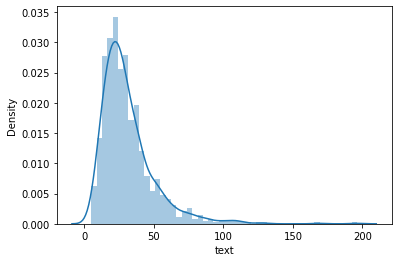

In [31]:
#@title
# 日本語BERTで扱える文章の長さは512
import seaborn as sns
title_length = df3['text'].map(tokenizer.encode).map(len)
print(max(title_length))

sns.distplot(title_length)

In [32]:
# DataLoaderの作成

batch_size = 12


dl_train = torchtext.legacy.data.Iterator(
    dataset_train, batch_size=batch_size, train=True)

dl_eval = torchtext.legacy.data.Iterator(
    dataset_eval, batch_size=batch_size, train=False, sort=False)

dl_test = torchtext.legacy.data.Iterator(
    dataset_test, batch_size=batch_size, train=False, sort=False)

# 辞書オブジェクトにまとめる
dataloaders_dict = {"train": dl_train, "val": dl_eval}

In [33]:
# DataLoaderの動作確認 

batch = next(iter(dl_test))
print(batch)
print(batch.Text[0].shape)
print(batch.Label2.shape)


[torchtext.legacy.data.batch.Batch of size 12]
	[.Text]:('[torch.LongTensor of size 12x512]', '[torch.LongTensor of size 12]')
	[.Label]:[torch.LongTensor of size 12]
	[.Label2]:[torch.LongTensor of size 12]
	[.Label3]:[torch.LongTensor of size 12]
	[.Label4]:[torch.LongTensor of size 12]
	[.Label5]:[torch.LongTensor of size 12]
	[.Label6]:[torch.LongTensor of size 12]
	[.Label7]:[torch.LongTensor of size 12]
	[.Label8]:[torch.LongTensor of size 12]
	[.Label9]:[torch.LongTensor of size 12]
	[.Label10]:[torch.LongTensor of size 12]
	[.Label11]:[torch.LongTensor of size 12]
	[.Label12]:[torch.LongTensor of size 12]
torch.Size([12, 512])
torch.Size([12])


In [34]:
from torch import nn


class BertForReview(nn.Module):
    '''BERTモデルにレビュー文の2クラスを判定する部分をつなげたモデル'''

    def __init__(self):
        super(BertForReview, self).__init__()

        # BERTモジュール
        self.bert = model  # 日本語学習済みのBERTモデル

        # headにポジネガ予測を追加
        # 入力はBERTの出力特徴量の次元768、出力は12クラス
        self.cls = nn.Linear(in_features=768, out_features=12)

        # 重み初期化処理
        nn.init.normal_(self.cls.weight, std=0.02)
        nn.init.normal_(self.cls.bias, 0)

    def forward(self, input_ids):
        '''
        input_ids： [batch_size, sequence_length]の文章の単語IDの羅列
        '''

        # BERTの基本モデル部分の順伝搬
        # 順伝搬させる
        result = self.bert(input_ids)  # reult は、sequence_output, pooled_output

        # sequence_outputの先頭の単語ベクトルを抜き出す
        vec_0 = result[0]  # 最初の0がsequence_outputを示す
        vec_0 = vec_0[:, 0, :]  # 全バッチ。先頭0番目の単語の全768要素
        vec_0 = vec_0.view(-1, 768)  # sizeを[batch_size, hidden_size]に変換
        output = self.cls(vec_0)  # 全結合層

        return output

In [35]:
#モデル構築
net = BertForReview()

# 訓練モードに設定
net.train()

print('ネットワーク設定完了')

ネットワーク設定完了


In [36]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in net.cls.parameters():
    param.requires_grad = True

In [37]:
# 最適化手法の設定
import torch.optim as optim

# BERTの元の部分はファインチューニング
optimizer = optim.Adam([
    {'params': net.bert.encoder.layer[-1].parameters(), 'lr': 5e-5},
    {'params': net.cls.parameters(), 'lr': 1e-3}
])

# 損失関数
criterion = nn.BCEWithLogitsLoss()
# nn.LogSoftmax()を計算してからnn.NLLLoss(negative log likelihood loss)を計算

In [38]:
# -*- coding:utf-8 -*-
import torch

print(torch.__version__) # 0.4.0

1.9.0+cu102


In [39]:
# モデルを学習させる関数を作成


def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)
    print('-----start-------')

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # ミニバッチのサイズ
    batch_size = dataloaders_dict["train"].batch_size

    # epochのループ
    for epoch in range(num_epochs):
        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数
            iteration = 1

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書型変数

                # GPUが使えるならGPUにデータを送る
                inputs = batch.Text[0].to(device)  # 文章
                labels = batch.Label.to(device)  # ラベル
                labels2 = batch.Label2.to(device)
                labels3 = batch.Label3.to(device)
                labels4 = batch.Label4.to(device)
                labels5 = batch.Label5.to(device)
                labels6 = batch.Label6.to(device)
                labels7 = batch.Label7.to(device)
                labels8 = batch.Label8.to(device)
                labels9 = batch.Label9.to(device)
                labels10 = batch.Label10.to(device)
                labels11 = batch.Label11.to(device)
                labels12 = batch.Label12.to(device)
                pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)
                
                pa = torch.tensor(pa, dtype=torch.float32)


                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):

                    # BERTに入力
                    outputs = net(inputs)
##############################################################################################################################################


                    loss = criterion(outputs, pa)  # 損失を計算

#第二引数の1は行。axis = 1と同じ。
#torch.maxは最大値（テンソル）とその要素位置の２つを返しますが、その最大値を_で受けとっています。　ただ、最大値は不要なので適当な名前(_)の変数としています。
                    preds = 0
                    preds = outputs
                    m = nn.Softmax(dim=1)
                    preds = m(preds)

                    preds = torch.round(preds)
                  


                    # 訓練時は逆誤差伝搬
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
#10イテレーションごとの計算で、割るときの分母にはバッチサイズに12をかけておく
                        if (iteration % 10 == 0):  # 10iterに1度、lossを表示
                            acc = (torch.sum(preds == pa.data)
                                   ).double()/(12*batch_size)
                            print('イテレーション {} || Loss: {:.4f} || 10iter. || 本イテレーションの正解率：{}'.format(
                                iteration, loss.item(),  acc))

                    iteration += 1

                    # 損失と正解数の合計を更新
                    epoch_loss += loss.item() * batch_size
                    epoch_corrects += torch.sum(preds == pa.data)                    

            # epochごとのlossと正解率
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / (12*len(dataloaders_dict[phase].dataset))

            print('Epoch {}/{} | {:^5} |  Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss, epoch_acc))

    return net

In [40]:
# モデルを学習させる関数を作成


def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)
    print('-----start-------')

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # ミニバッチのサイズ
    batch_size = dataloaders_dict["train"].batch_size

    # epochのループ
    for epoch in range(num_epochs):
        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数
            iteration = 1

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書型変数

                # GPUが使えるならGPUにデータを送る
                inputs = batch.Text[0].to(device)  # 文章
                labels = batch.Label.to(device)  # ラベル
                labels2 = batch.Label2.to(device)
                labels3 = batch.Label3.to(device)
                labels4 = batch.Label4.to(device)
                labels5 = batch.Label5.to(device)
                labels6 = batch.Label6.to(device)
                labels7 = batch.Label7.to(device)
                labels8 = batch.Label8.to(device)
                labels9 = batch.Label9.to(device)
                labels10 = batch.Label10.to(device)
                labels11 = batch.Label11.to(device)
                labels12 = batch.Label12.to(device)
                pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)
                
                pa = torch.tensor(pa, dtype=torch.float32)


                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):

                    # BERTに入力
                    outputs = net(inputs)
##############################################################################################################################################


                    loss = criterion(outputs, pa)  # 損失を計算
                    Loss = float(loss)
                    print("Loss : ", Loss)
    
#第二引数の1は行。axis = 1と同じ。
#torch.maxは最大値（テンソル）とその要素位置の２つを返しますが、その最大値を_で受けとっています。　ただ、最大値は不要なので適当な名前(_)の変数としています。

                
                    # 訓練時は逆誤差伝搬
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

#10イテレーションごとの計算で、割るときの分母にはバッチサイズに12をかけておく
            print('Epoch :',epoch+1)

    return net

In [41]:
# 学習・検証を実行する。
num_epochs = 20

net_trained = train_model(net, dataloaders_dict,
                          criterion, optimizer, num_epochs=num_epochs)

使用デバイス： cuda:0
-----start-------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss :  0.9969847202301025
Loss :  0.7635351419448853
Loss :  0.6139737367630005
Loss :  0.5114029049873352
Loss :  0.43656885623931885
Loss :  0.43099236488342285
Loss :  0.3724709749221802
Loss :  0.32569804787635803
Loss :  0.43477344512939453
Loss :  0.4566986858844757
Loss :  0.480097234249115
Loss :  0.33428841829299927
Loss :  0.5237143635749817
Loss :  0.3894786834716797
Loss :  0.360396146774292
Loss :  0.3716301918029785
Loss :  0.4408351182937622
Loss :  0.520209789276123
Loss :  0.45691490173339844
Loss :  0.40028128027915955
Loss :  0.45075878500938416
Loss :  0.38010263442993164
Loss :  0.33838731050491333
Loss :  0.3762267529964447
Loss :  0.35005417466163635
Loss :  0.41747960448265076
Loss :  0.40989676117897034
Loss :  0.3556002080440521
Loss :  0.30180516839027405
Loss :  0.39061084389686584
Loss :  0.42348718643188477
Loss :  0.3920705318450928
Loss :  0.46204376220703125
Loss :  0.3898143172264099
Loss :  0.3653140962123871
Loss :  0.3296594023704529
Loss :  0.3902

In [160]:
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

ImportError: ignored

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

使用デバイス： cuda:0
-----start-------


In [48]:
inputs_pre = torch.zeros(512)
inputs_pre = inputs_pre.cuda()
#inputs_pre = inputs_pre.cpu()

In [143]:
from tqdm import tqdm

labels_numpy = 0
preds_numpy = 0

aa = []
bb = []

# テストデータでの正解率を求める
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_trained.eval()   # モデルを検証モードに
net_trained.to(device)  # GPUが使えるならGPUへ送る

# epochの正解数を記録する変数
epoch_corrects = 0

a = [[0, 0],
     [0, 0]]

for batch in tqdm(dl_test):  # testデータのDataLoader
    # batchはTextとLableの辞書オブジェクト
    # GPUが使えるならGPUにデータを送る
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    inputs = batch.Text[0].to(device)  # 文章
    labels = batch.Label.to(device)  # ラベル
    labels2 = batch.Label2.to(device)
    labels3 = batch.Label3.to(device)
    labels4 = batch.Label4.to(device)
    labels5 = batch.Label5.to(device)
    labels6 = batch.Label6.to(device)
    labels7 = batch.Label7.to(device)
    labels8 = batch.Label8.to(device)
    labels9 = batch.Label9.to(device)
    labels10 = batch.Label10.to(device)
    labels11 = batch.Label11.to(device)
    labels12 = batch.Label12.to(device)
    pa = torch.stack([labels, labels2, labels3, labels4, labels5,labels6,labels7,labels8,labels9,labels10, labels11, labels12], dim = 1)
                
    pa = torch.tensor(pa, dtype=torch.float32)


    # 順伝搬（forward）計算
    with torch.set_grad_enabled(False):

        # BertForReviewに入力
        outputs = net_trained(inputs)

        loss = criterion(outputs, pa)  # 損失を計算
                  
        #epoch_corrects += torch.sum(preds == pa.data)  # 正解数の合計を更新

#ラベルとoutputsを入手
        labels_numpy = pa.cpu().numpy()
        outputs_numpy = outputs.cpu().numpy()

        aa = np.append(aa,labels_numpy)
        bb = np.append(bb,outputs_numpy)



100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


In [144]:
loss

tensor(0.2825, device='cuda:0')

In [145]:
float(loss)

0.28252431750297546

In [146]:
bb

array([-4.61596155, -8.42434692, -4.29112244, ..., -3.89150071,
       -2.82455182, -5.77447128])

In [147]:
sum(bb)/len(bb)

-2.862694364940075

In [148]:
max(bb)

6.119914531707764

In [149]:
#正解ラベル
aa
aa1 = aa.reshape(240, 12)
aa1.shape
aa1 = np.array(aa1)
aa1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [150]:
hani = [-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
       -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
       -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
       -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
       -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
       -0.05, -0.04, -0.03, -0.02, -0.01]

In [151]:
hani = np.array(hani)

bb1 = np.array(bb1)
bb1.shape

(2880,)

In [152]:
bb1 = bb
for i in range(0, len(bb1)):
  if bb1[i] >  -0.1:
    bb1[i] = 1
  else:
    bb1[i] = 0 

In [162]:
for i in range(0, len(y)):
  print(i, y[i])

0 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
7 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
10 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
11 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
12 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
13 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
16 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
17 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
21 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
22 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
23 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
24 [0. 0. 0. 1. 0. 0. 0. 0

In [153]:
y = bb1.reshape(240, 12)

In [154]:
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x = aa1
for i in range(0, 240):
   for j in  range(0, 12):
     if x[i][j] == y[i][j]:
       if x[i][j] == 1:
         x1 = x1 + 1
       else:
         x2 = x2 + 1
     if x[i][j] != y[i][j]:
       if x[i][j] == 1:
         x3 = x3 + 1
       else:
         x4 = x4 + 1
print("1を1と当てた：",x1)
print("0を0と当てた：",x2)
print("1を0と間違えた：",x3)
print("0を1と間違えた：",x4)

1を1と当てた： 188
0を0と当てた： 2368
1を0と間違えた： 167
0を1と間違えた： 157


In [155]:
x = aa1
ln = []
for j in range(0, 12):
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
    
  for i in  range(0, 240):
    if x[i][j] == y[i][j]:
      if x[i][j] == 1:
         x1 = x1 + 1
      else:
         x2 = x2 + 1
    if x[i][j] != y[i][j]:
       if x[i][j] == 1:
         x3 = x3 + 1
       else:
         x4 = x4 + 1
  ln.append(x1)
  ln.append(x2)
  ln.append(x3)
  ln.append(x4)
  print("何列目か：", j)     
  print("1を1と当てた：",x1)
  print("0を0と当てた：",x2)
  print("1を0と間違えた：",x3)
  print("0を1と間違えた：",x4)

何列目か： 0
1を1と当てた： 36
0を0と当てた： 162
1を0と間違えた： 8
0を1と間違えた： 34
何列目か： 1
1を1と当てた： 0
0を0と当てた： 229
1を0と間違えた： 8
0を1と間違えた： 3
何列目か： 2
1を1と当てた： 30
0を0と当てた： 181
1を0と間違えた： 7
0を1と間違えた： 22
何列目か： 3
1を1と当てた： 4
0を0と当てた： 222
1を0と間違えた： 7
0を1と間違えた： 7
何列目か： 4
1を1と当てた： 45
0を0と当てた： 145
1を0と間違えた： 29
0を1と間違えた： 21
何列目か： 5
1を1と当てた： 3
0を0と当てた： 199
1を0と間違えた： 34
0を1と間違えた： 4
何列目か： 6
1を1と当てた： 22
0を0と当てた： 192
1を0と間違えた： 5
0を1と間違えた： 21
何列目か： 7
1を1と当てた： 0
0を0と当てた： 237
1を0と間違えた： 3
0を1と間違えた： 0
何列目か： 8
1を1と当てた： 16
0を0と当てた： 178
1を0と間違えた： 22
0を1と間違えた： 24
何列目か： 9
1を1と当てた： 0
0を0と当てた： 214
1を0と間違えた： 26
0を1と間違えた： 0
何列目か： 10
1を1と当てた： 31
0を0と当てた： 180
1を0と間違えた： 10
0を1と間違えた： 19
何列目か： 11
1を1と当てた： 1
0を0と当てた： 229
1を0と間違えた： 8
0を1と間違えた： 2


In [156]:
acc2 = sum(y == aa1)
#各ラベルの正解率
acc2/240

array([0.825     , 0.95416667, 0.87916667, 0.94166667, 0.79166667,
       0.84166667, 0.89166667, 0.9875    , 0.80833333, 0.89166667,
       0.87916667, 0.95833333])

In [158]:
cm = multilabel_confusion_matrix(aa1, y)

In [ ]:
for j in range(0, 50):
  bb1 =bb
  for i in range(0, len(bb1)):
    if bb1[i] >  hani[j]:
      bb1[i] = 1
    else:
      bb1[i] = 0  